# Reproduce: Squeezing of intracavity and traveling-wave light fields produced in parametric amplification

M. J. Collett and C. W. Gardiner, <i>Squeezing of intracavity and traveling-wave light fields produced in parametric amplification</i>, <a href="http://journals.aps.org/pra/abstract/10.1103/PhysRevA.30.1386">Phys. Rev. A <b>30</b>, 1386 (1984)</a>.

Author : <b>Eunjong Kim</b> (<a href="mailto:ekim7206@gmail.com">ekim7206@gmail.com</a>)

Status : Work in progress

In this notebook, I will derive the equations governing the input-output formulation of optical cavity, which is a grueling task if done with bruteforce hand calculation.

## Setup Modules

In [1]:
from sympy import *
init_printing()

In [2]:
from sympsi import *
from sympsi.boson import BosonOp, MultiBosonOp, BosonVacuumKet
from sympsi.operator import OperatorFunction
from sympsi.expectation import Expectation, Covariance
from sympsi.operatorordering import normal_ordered_form

## Quantum Stochastic Differential Equation (QSDE)

In [3]:
x = symbols('x', real=True)
t, t0, t1, t_ = symbols("t, t_0, t_1, {t'}", real=True)
w, w0, w1, w_ = symbols("\omega, \omega_0, \omega_1, {\omega'}", real=True)
k_w = Function('k')(w)
g = Function('g')
hbar = Symbol("hbar")

First, define the time-dependent cavity field operators $a(t)$, $a^\dagger(t)$

In [4]:
a = BosonOp("a")
a_t = OperatorFunction(a, t)
a_t

and the time-dependent field operators of the external multimode field, $b_{\omega}(t)$, $b_{\omega}^\dagger(t)$

In [5]:
b_w = MultiBosonOp("b", w, 'continuous')
b_w_t = OperatorFunction(b_w, t)
b_w_t

The interaction Hamiltonian between the cavity field, represented by the harmonic oscillator annihilation and creation operators $a, a^\dagger$, and the external field in the rotating wave approximation is given by

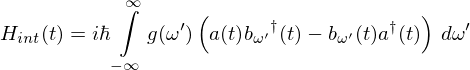

In [6]:
Hint = I*hbar * Integral((g(w) * (a_t * Dagger(b_w_t) - b_w_t * Dagger(a_t))).subs(w, w_), (w_,-oo,oo))
Hintsym = Symbol("{H_{int}} (t)")
Eq(Hintsym, Hint)

### The Heisenberg Equation of Motion for the field operator $b_t(\omega)$

The Heisenberg equation of motion of the operator $b_\omega(t) = e^{-i\omega t} b_\omega$ can be expressed as


$$
\frac{d}{dt}b_\omega(t) = \frac{\partial}{\partial t} b_\omega(t) - \frac{i}{\hbar}[b_\omega(t), H_{int}(t)]
$$

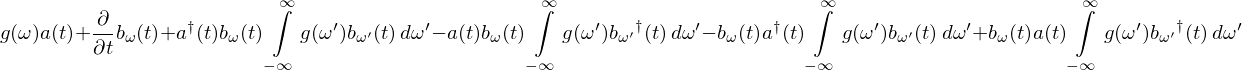

In [7]:
b_w_t_diff = b_w_t.diff(t) - I/hbar * Commutator(b_w_t, Hint.replace(w, w_))
b_w_t_diff1 = b_w_t_diff.expand(commutator=True).expand(commutator=True).doit()
b_w_t_diff2 = pull_outwards(b_w_t_diff1).doit()
b_w_t_diff2

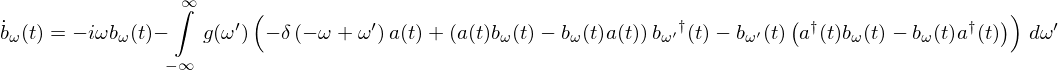

In [8]:
b_w_t_diff3 = b_w_t_diff1.subs(b_w_t, exp(-I*w*t)*b_w).doit().subs(exp(-I*w*t)*b_w, b_w_t)
Eq(Symbol("{\dot{b}_\omega}(t)"), b_w_t_diff3)

This is equivalent to
$$
\frac{d}{dt}\left( e^{i\omega t} b_\omega (t)\right) = e^{i\omega t} \left[ \dot{b}_\omega(t) + i\omega b_\omega (t)\right] = g(\omega) a(t) e^{i\omega t}
$$

and the solution to this differential equation can be written in two ways:

#### a. in terms of the initial conditions at time $t_0 <t$ (the <i>input</i>)

$$
e^{i\omega t}b_\omega(t) - e^{i\omega t_0} b_\omega(t_0) = \int_{t_0}^{t\ \ \ } g(\omega) a(t') e^{i\omega t'} dt' \\
\therefore b_\omega(t) = e^{-i\omega(t-t_0)} b_\omega(t_0) + g(\omega) \int_{t_0}^{t} e^{-i\omega (t-t')} a(t') dt'
$$

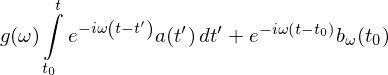

In [9]:
b_w_t_input = exp(-I*w*(t-t0)) * b_w_t(t0) + g(w) * Integral(exp(-I*w*(t-t_)) * a_t(t_), (t_, t0, t))
b_w_t_input

#### b. in terms of the final conditions at time $t_1>t$ (the <i>output</i>)


$$
\displaystyle e^{i\omega t_1}b_\omega(t_1) - e^{i\omega t} b_\omega(t) = \int_{t}^{t_1\ \ } g(\omega) a(t') e^{i\omega t'} dt'\\
\therefore b_\omega(t) = e^{-i\omega(t-t_1)} b_\omega(t_1) - g(\omega) \int_{t}^{t_1} e^{-i\omega (t-t')} a(t') dt'
$$

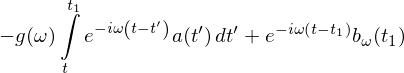

In [10]:
b_w_t_output = exp(-I*w*(t-t1)) * b_w_t(t1) - g(w) * Integral(exp(-I*w*(t-t_))*a_t(t_), (t_, t, t1))
b_w_t_output

### The Heisenberg equation of motion of the cavity field operator $a(t)$

The Heisenberg equation of motion of the cavity field operator can be expressed as


$$
\dot{a} =  - \frac{i}{\hbar}[a, H_{sys}] - \frac{i}{\hbar}[a, H_{int}] 
$$

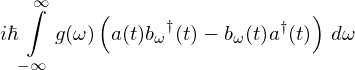

In [11]:
Hint = Hint.replace(w_, w)
Hint

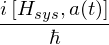

In [12]:
Hsyssym = Operator('H_sys') # Hamiltonian of the system
term1 = -I/hbar * Commutator(a_t, Hsyssym)
term1

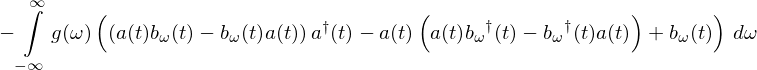

In [13]:
term2_0 = -I/hbar * Commutator(a_t, Hint)
term2_1 = term2_0.expand(commutator=True).expand(commutator=True).doit(independent=True)
term2_1

substituting the solution in terms of the input field,

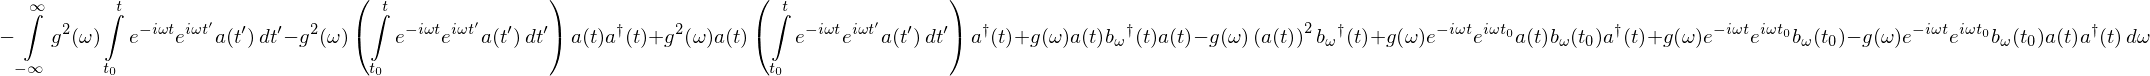

In [14]:
term2_2 = term2_1.replace(b_w_t, b_w_t_input).expand()
term2_2

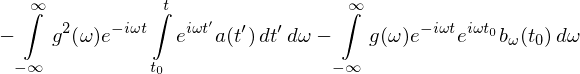

In [15]:
term2_3 = pull_outwards(term2_2)
term2_3

### Markov quantum stochastic process

Suppose that $g(\omega)$ is independent of the frequency over a wide range of frequencies around $\omega=0$ and has the value

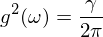

In [16]:
gamma = Symbol("\gamma", real=True); Eq(g(w)**2, gamma/(2*pi))

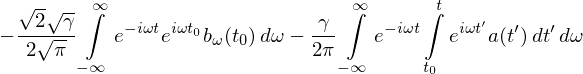

In [17]:
term2_4 = pull_outwards(term2_3.replace(g(w), sqrt(gamma/(2*pi))))
term2_4

Defining an <i>input field</i> as 

$$
a_{in}(t) = -\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} d\omega\ e^{-i\omega(t-t_0)} b_\omega(t_0)
$$

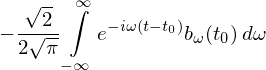

In [18]:
a_in_t = -1/sqrt(2*pi) * Integral(exp(-I*w*(t-t0)) * b_w_t(t0), (w, -oo, oo))
a_in_t

This operator satisfies the commutation relation

$[a_{in}(t), a_{in}^\dagger(t')] = $

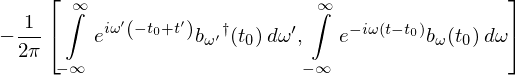

In [19]:
comm = Commutator(a_in_t, Dagger(a_in_t.replace(t, t_)).replace(w, w_))
comm

In [20]:
replace_dirac_delta(pull_outwards(push_inwards(comm.expand(commutator=True).expand(commutator=True)).doit().args[1][0]))

The operator $a_{in}(t)$ satisfies the commutation relations:
$$
[a_{in}(t),a_{in}^\dagger (t')] = \delta (t-t'), \quad [a_{in}(t),a_{in}(t')] =[a_{in}^\dagger(t),a_{in}^\dagger (t')] =0
$$

So it is possible to treat them as multimode Bosonic Operators with continuous mode $t$.

In [21]:
a_in = Operator('a_in')
a_in_t = OperatorFunction(a_in, t)
a_in_t

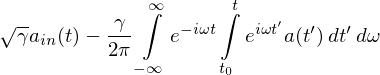

In [22]:
term2_5 = term2_4.subs(Integral(exp(-I*w*(t-t0)) * b_w_t(t0), (w, -oo, oo)).expand(), -sqrt(2*pi)* a_in_t)
term2_5

Applying the <b>Leibniz integral rule</b>(http://en.wikipedia.org/wiki/Leibniz_integral_rule),

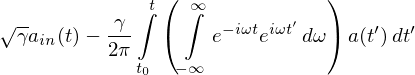

In [23]:
term2_6 = pull_outwards(exchange_integral_order(push_inwards(term2_5)))
term2_6

and replacing the integrand with Dirac Delta function,

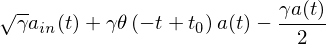

In [24]:
term2_7 = replace_dirac_delta(term2_6).doit().expand()
term2_7

To use our assumption $t>t_0$, we introduce the function <tt>assume_positive</tt>,

In [25]:
def assume_positive(e, p_number):
    """
    Assume p_number positive in the expression e
    """
    positive = Symbol("epsilon",positive=True)
    return e.subs(p_number, positive).subs(positive, p_number)

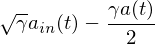

In [26]:
term2 = assume_positive(term2_7, t-t0)
term2

So, the Heisenberg equation of motion for cavity field $a(t)$ reduces to

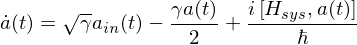

In [27]:
a_t_diff1 = term1 + term2
a_t_diffsym = Symbol("\dot{a} (t)")
Eq(a_t_diffsym, a_t_diff1)

This is a <i>quantum stochastic differential equation</i> (qsde) for the intracavity field, $a(t)$.

Alternatively, we can define the output field operator as
$$
a_{out}(t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} d\omega \ e^{-i\omega(t-t_1)} b_\omega(t_1)
$$

By the same token, $a_{out}(t)$ also satisfied the commutation relations


$$
[a_{out}(t),a_{out}^\dagger (t')] = \delta (t-t'), \quad [a_{out}(t),a_{out}(t')] =[a_{out}^\dagger(t),a_{out}^\dagger (t')] =0
$$
and hence can also be considered a multimode Bosonic Operators with continuous mode $t$.

In [28]:
a_out = Operator('a_out')
a_out_t = OperatorFunction(a_out, t)
a_out_t

Repeating the same procedure we did just above,

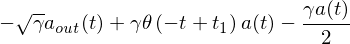

In [29]:
term2_2 = term2_1.replace(b_w_t, b_w_t_output).expand()
term2_3 = pull_outwards(term2_2)
term2_4 = pull_outwards(term2_3.replace(g(w), sqrt(gamma/(2*pi))))
term2_5 = term2_4.subs(Integral(exp(-I*w*(t-t1)) * b_w_t(t1), (w, -oo, oo)).expand(), sqrt(2*pi)* a_out_t)
term2_6 = pull_outwards(exchange_integral_order(push_inwards(term2_5)))
term2_7 = replace_dirac_delta(term2_6).doit().expand()
term2_7

To use our assumption $t_1>t$, we employ <tt>assume_positive</tt> function, as we did before:

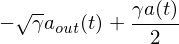

In [30]:
term2_8 = assume_positive(term2_7, t1-t)
term2_8

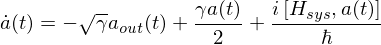

In [31]:
a_t_diff2 = term1 + term2_8
Eq(a_t_diffsym, a_t_diff2)

To summarize, the Heisenberg equation of motion for the intracavity operator $a(t)$ are given by

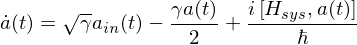

In [32]:
Eq(a_t_diffsym, a_t_diff1)

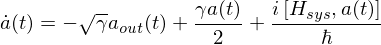

In [33]:
Eq(a_t_diffsym, a_t_diff2)

and hence the input and output fields are then seen to be related by

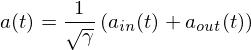

In [34]:
Eq(a_t, solve(a_t_diff2 - a_t_diff1, a_t)[0])

### Linear Systems

For a linear system, the Heisenberg equation of motion for $a(t)$ can be simply expressed as


$$
\frac{d\mathbf{a}(t)}{dt} = \left( \mathbf{A} - \frac{\gamma}{2}\mathbb{I}\right) \mathbf{a}(t) + \sqrt{\gamma} \mathbf{a}_{in}(t) \\
= \left( \mathbf{A} + \frac{\gamma}{2}\mathbb{I}\right) \mathbf{a}(t) - \sqrt{\gamma} \mathbf{a}_{out}(t)
$$

where
$$\mathbf{a}(t) = \begin{bmatrix} a(t) \\ a^\dagger (t) \end{bmatrix}
$$
and $\mathbf{A}$ is a matrix.

In terms of the frequency components, defined by $\tilde{a}(\omega) \equiv \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{i\omega t} a(t) dt$,

$$
\mathbf{a}(t) = \begin{bmatrix}
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t} \tilde{a}(\omega) d\omega \\
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{i\omega t} \tilde{a}^\dagger(\omega) d\omega 
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t} \tilde{a}(\omega) d\omega \\
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t} \tilde{a}^\dagger(-\omega) d\omega 
\end{bmatrix}
= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t}  \tilde{\mathbf{a}}(\omega) d\omega
$$
where
$$\tilde{\mathbf{a}}(\omega) = \begin{bmatrix} a(\omega) \\ a^\dagger (-\omega) \end{bmatrix}
$$

The equation becomes
$$
-i\omega \tilde{\mathbf{a}}(\omega) = \left(\mathbf{A} - \frac{\gamma}{2}\mathbb{I}\right) \tilde{\mathbf{a}}(\omega)+ \sqrt{\gamma} \tilde{\mathbf{a}}_{in}(\omega) \\
= \left( \mathbf{A} + \frac{\gamma}{2}\mathbb{I}\right) \tilde{\mathbf{a}}(\omega) - \sqrt{\gamma} \tilde{\mathbf{a}}_{out}(\omega)
$$

Rearranging to eliminate the intermal mode,$$
\tilde{\mathbf{a}}_{out}(\omega) = \left[ \mathbf{A} + \left(\frac{\gamma}{2} + i\omega\right) \mathbb{1}\right]
\left[-\mathbf{A} + \left(\frac{\gamma}{2} - i\omega\right) \mathbb{1}\right]^{-1} \tilde{\mathbf{a}}_{in}(\omega)$$

## A One-Sided Cavity

If the system Hamiltonian is assumed to be a free Harmonic oscillator, we get a model of a single mode in a one-sided cavity.

In [35]:
Hsys = hbar * w0 * Dagger(a_t) * a_t
Eq(Hsyssym, Hsys)

In [36]:
term1_ = term1.subs(Hsyssym, Hsys).expand(commutator=True).doit()
term1_

The equation for the intermal-mode operator is:

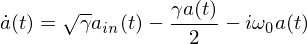

In [37]:
Eq(a_t_diffsym, a_t_diff1.subs(Hsyssym, Hsys).expand(commutator=True).doit())

Thus, the matrix $\mathbf{A}$ becomes

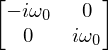

In [38]:
A = Matrix([[-I*w0, 0], [0, I*w0]])
A

and the coefficient matrix connecting $\tilde{\mathbf{a}}_{out}(\omega)$ and $\tilde{\mathbf{a}}_{out}(\omega)$ becomes

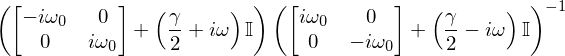

In [39]:
Id = Identity(2)
T = (A + (gamma/2 + I*w) *  Id) * (-A + (gamma/2 - I*w)*Id).inverse()
T

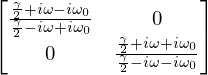

In [40]:
T.subs(Id, eye(2)).doit(deep=True)

We obtain the following relations:
$$\tilde{a}(\omega) = \frac{\sqrt{\gamma}}{\frac{\gamma}{2} - i(\omega-\omega_0)} \tilde{a}_{in} (\omega),\quad
\tilde{a}_{out} (\omega) = \frac{\frac{\gamma}{2}+i(\omega-\omega_0)}{\frac{\gamma}{2}-i(\omega-\omega_0)} \tilde{a}_{in} (\omega) .$$